In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import time
import sys

#import TDMS_MHD as MHD

#Make sure Python Analysis folder in in PYTHONPATH and import the MHDpy module
PythonAnalysisPath = 'C:\\Users\\aspit\\Documents\\Git\\MHDLab\\Python Analysis'
if not PythonAnalysisPath in sys.path:
    sys.path.append(PythonAnalysisPath)
import MHDpy.old as MHD

import pandas as pd
%matplotlib inline

mpl.rcParams.update({'font.size': 18})


class VaporTubes(MHD.TDMS,MHD.TDMS_pd):
    def __init__(self, ):
        MHD.TDMS.__init__(self) 
        MHD.TDMS_pd.__init__(self)   
    
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx
    
    


In [2]:

laserprofile = VaporTubes()
laserprofile.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23")

f50Hz = VaporTubes()

p50Hz = VaporTubes()

f50Hz.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-04-05 Power dependence\\Try 1")

f50Hz.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-04-05 Power dependence\\Seqtry2")

p50Hz.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-04-05 Power dependence\\Powermeter\\Chosen\\50Hz")

print(f50Hz.pathnames)

Run15kV_Rb_NDF00_seq_50Hz_2000aq.tdms    C:\Users\aspit\OneDrive\Data\2018-04-05 Power ...
Run15kV_Rb_NDF00_seq_50Hz_500aq.tdms     C:\Users\aspit\OneDrive\Data\2018-04-05 Power ...
Run15kV_Rb_NDF01_seq_50Hz.tdms           C:\Users\aspit\OneDrive\Data\2018-04-05 Power ...
Run15kV_Rb_NDF02_seq_50Hz_7.tdms         C:\Users\aspit\OneDrive\Data\2018-04-05 Power ...
Run1_TC_2.tdms                           C:\Users\aspit\OneDrive\Data\2018-04-05 Power ...
dtype: object


In [3]:
f50Hz.import_data(f50Hz.pathnames['Run15kV_Rb_NDF00_seq_50Hz_2000aq.tdms'])
f50Hz.import_data(f50Hz.pathnames['Run15kV_Rb_NDF01_seq_50Hz.tdms'])
f50Hz.import_data(f50Hz.pathnames['Run15kV_Rb_NDF02_seq_50Hz_7.tdms'])
NDF00_50Hz = f50Hz.imports[f50Hz.pathnames['Run15kV_Rb_NDF00_seq_50Hz_2000aq.tdms']]
NDF01_50Hz = f50Hz.imports[f50Hz.pathnames['Run15kV_Rb_NDF01_seq_50Hz.tdms']]
NDF02_50Hz = f50Hz.imports[f50Hz.pathnames['Run15kV_Rb_NDF02_seq_50Hz_7.tdms']]

p50Hz.import_data(p50Hz.pathnames['Run15kV_Powermeter_NDF00_seq_50Hz_2000aq.tdms'])
p50Hz.import_data(p50Hz.pathnames['Run15kV_Powermeter_NDF01_seq_50Hz.tdms'])
p50Hz.import_data(p50Hz.pathnames['Run15kV_Powermeter_NDF02_seq_50Hz_7.tdms'])
p_NDF00_50Hz = p50Hz.imports[p50Hz.pathnames['Run15kV_Powermeter_NDF00_seq_50Hz_2000aq.tdms']]
p_NDF01_50Hz = p50Hz.imports[p50Hz.pathnames['Run15kV_Powermeter_NDF01_seq_50Hz.tdms']]
p_NDF02_50Hz = p50Hz.imports[p50Hz.pathnames['Run15kV_Powermeter_NDF02_seq_50Hz_7.tdms']]

filepath_laser = laserprofile.pathnames[0]
laserprofile.import_data(filepath_laser)
file_laser = laserprofile.imports[filepath_laser]

In [4]:
NDF00_50Hz.groups()

['Common',
 'Wavelength Array',
 'Gate Delay Arrays',
 'Integrated Emission',
 'Raw_1']

In [5]:
#Pull in relevant groups

offset_time = 870

NDF00_50Hz_time = f50Hz.get_data_pdframe(NDF00_50Hz,'Gate Delay Arrays')
NDF00_50Hz_time = NDF00_50Hz_time['GateDelay_1'].as_matrix()
NDF00_50Hz_time = NDF00_50Hz_time[~np.isnan(NDF00_50Hz_time)]
NDF00_50Hz_time = NDF00_50Hz_time - offset_time
NDF00_50Hz_data = f50Hz.get_data_pdframe(NDF00_50Hz,'Raw_1')
NDF00_50Hz_power = p50Hz.get_data_pdframe(p_NDF00_50Hz,'Meter 1')
NDF00_50Hz_power = NDF00_50Hz_power['Power'].as_matrix()

NDF01_50Hz_time = f50Hz.get_data_pdframe(NDF01_50Hz,'Gate Delay Arrays')
NDF01_50Hz_time = NDF01_50Hz_time['GateDelay_1'].as_matrix()
NDF01_50Hz_time = NDF01_50Hz_time[~np.isnan(NDF01_50Hz_time)]
NDF01_50Hz_time = NDF01_50Hz_time - offset_time
NDF01_50Hz_data = f50Hz.get_data_pdframe(NDF01_50Hz,'Raw_1')
NDF01_50Hz_power = p50Hz.get_data_pdframe(p_NDF01_50Hz,'Meter 1')
NDF01_50Hz_power = NDF01_50Hz_power['Power'].as_matrix()

NDF02_50Hz_time = f50Hz.get_data_pdframe(NDF02_50Hz,'Gate Delay Arrays')
NDF02_50Hz_time = NDF02_50Hz_time['GateDelay_1'].as_matrix()
NDF02_50Hz_time = NDF02_50Hz_time[~np.isnan(NDF02_50Hz_time)]
NDF02_50Hz_time = NDF02_50Hz_time - offset_time
NDF02_50Hz_data = f50Hz.get_data_pdframe(NDF02_50Hz,'Raw_1')
NDF02_50Hz_power = p50Hz.get_data_pdframe(p_NDF02_50Hz,'Meter 1')
NDF02_50Hz_power = NDF02_50Hz_power['Power'].as_matrix()

wl = f50Hz.get_data_pdframe(NDF00_50Hz,'Wavelength Array')
wavelength = wl['Wavelength_1'].as_matrix()

laser_common = laserprofile.get_data_pdframe(file_laser,'Raw')
laser_data = laserprofile.get_data_pdframe(file_laser,'Average')
laser_time = laser_common['Time1']
laser_data = laser_data['Mean']




laser_time_off = laser_time - offset_time

#timearrays = Run3.get_data_pdframe(file1,'Gate Delay Arrays')

#df1 = Run3.get_data_pdframe(file1,'Raw_Capture_1')


In [6]:

aq = 2000


NDF00_50Hz_power_avg = np.zeros(len(NDF00_50Hz_data.columns))
for i in range(0, len(NDF00_50Hz_data.columns)):
        NDF00_50Hz_power_avg[i] =  np.average(NDF00_50Hz_power[i*aq:(i+1)*aq])
        
NDF01_50Hz_power_avg = np.zeros(len(NDF01_50Hz_data.columns))
for i in range(0, len(NDF01_50Hz_data.columns)):
        NDF01_50Hz_power_avg[i] =  np.average(NDF01_50Hz_power[i*aq:(i+1)*aq])
        

NDF02_50Hz_power_avg = np.zeros(len(NDF02_50Hz_data.columns))
for i in range(0, len(NDF02_50Hz_data.columns)):
        NDF02_50Hz_power_avg[i] =  np.average(NDF02_50Hz_power[i*aq:(i+1)*aq])
        
        
print(NDF02_50Hz_power_avg)

[ 0.00058663  0.00058394  0.00058548  0.00061258  0.00063457  0.00059706
  0.00060273]


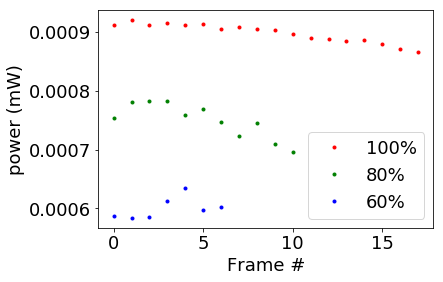

In [7]:
fig, ax1 = plt.subplots(1,1)
ln1 = ax1.plot(NDF00_50Hz_power_avg, 'r.', label = '100%')
ln2 = ax1.plot(NDF01_50Hz_power_avg, 'g.', label = '80%')
ln3 = ax1.plot(NDF02_50Hz_power_avg, 'b.', label = '60%')

ax1.set_ylabel('power (mW)')
ax1.set_xlabel('Frame #')
lns = ln1 + ln2 + ln3

labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)


In [8]:
idx_peak1_l = find_nearest(wavelength,778)
idx_peak1_r = find_nearest(wavelength,781.5)

idx_peak2_l = find_nearest(wavelength,793)
idx_peak2_r = find_nearest(wavelength,797)

wavelength_peak1 = wavelength[idx_peak1_l:idx_peak1_r]
wavelength_peak2 = wavelength[idx_peak2_l:idx_peak2_r]

NDF00_50Hz_data_p1 = NDF00_50Hz_data[idx_peak1_l:idx_peak1_r]
NDF00_50Hz_data_p2 = NDF00_50Hz_data[idx_peak2_l:idx_peak2_r]

NDF01_50Hz_data_p1 = NDF01_50Hz_data[idx_peak1_l:idx_peak1_r]
NDF01_50Hz_data_p2 = NDF01_50Hz_data[idx_peak2_l:idx_peak2_r]

NDF02_50Hz_data_p1 = NDF02_50Hz_data[idx_peak1_l:idx_peak1_r]
NDF02_50Hz_data_p2 = NDF02_50Hz_data[idx_peak2_l:idx_peak2_r]

In [9]:
laser_data_norm = laser_data/laser_data.max()

NDF00_50Hz_data_p1_avg = []
NDF00_50Hz_data_p2_avg = []
NDF00_50Hz_data_p1_max = []
NDF00_50Hz_data_p2_max = []

for frame in NDF00_50Hz_data_p1:
    maximum = NDF00_50Hz_data_p1[frame].max()
    avg = np.average(NDF00_50Hz_data_p1[frame])
    NDF00_50Hz_data_p1_max = np.append(NDF00_50Hz_data_p1_max, maximum)
    NDF00_50Hz_data_p1_avg = np.append(NDF00_50Hz_data_p1_avg, avg)
    
for frame in NDF00_50Hz_data_p2:
    maximum = NDF00_50Hz_data_p2[frame].max()
    avg = np.average(NDF00_50Hz_data_p2[frame])
    NDF00_50Hz_data_p2_max = np.append(NDF00_50Hz_data_p2_max, maximum)
    NDF00_50Hz_data_p2_avg = np.append(NDF00_50Hz_data_p2_avg, avg)

NDF00_50Hz_data_p1_max_norm = NDF00_50Hz_data_p1_max/NDF00_50Hz_data_p1_max.max()
NDF00_50Hz_data_p2_max_norm = NDF00_50Hz_data_p2_max/NDF00_50Hz_data_p2_max.max()
NDF00_50Hz_data_p1_avg_norm = NDF00_50Hz_data_p1_avg/NDF00_50Hz_data_p1_avg.max()
NDF00_50Hz_data_p2_avg_norm = NDF00_50Hz_data_p2_avg/NDF00_50Hz_data_p2_avg.max()

NDF00_50Hz_data_p1_max_norm00 = NDF00_50Hz_data_p1_max/NDF00_50Hz_data_p1_max.max()
NDF00_50Hz_data_p2_max_norm00 = NDF00_50Hz_data_p2_max/NDF00_50Hz_data_p2_max.max()
NDF00_50Hz_data_p1_avg_norm00 = NDF00_50Hz_data_p1_avg/NDF00_50Hz_data_p1_avg.max()
NDF00_50Hz_data_p2_avg_norm00 = NDF00_50Hz_data_p2_avg/NDF00_50Hz_data_p2_avg.max()

NDF00_50Hz_data_p1_max_norm_power = NDF00_50Hz_data_p1_max/NDF00_50Hz_power_avg
NDF00_50Hz_data_p1_max_norm_power /= NDF00_50Hz_data_p1_max_norm_power.max()
NDF00_50Hz_data_p2_max_norm_power = NDF00_50Hz_data_p2_max/NDF00_50Hz_power_avg
NDF00_50Hz_data_p2_max_norm_power /= NDF00_50Hz_data_p2_max_norm_power.max()
NDF00_50Hz_data_p1_avg_norm_power = NDF00_50Hz_data_p1_avg/NDF00_50Hz_power_avg
NDF00_50Hz_data_p1_avg_norm_power /= NDF00_50Hz_data_p1_avg_norm_power.max()
NDF00_50Hz_data_p2_avg_norm_power = NDF00_50Hz_data_p2_avg/NDF00_50Hz_power_avg
NDF00_50Hz_data_p2_avg_norm_power /= NDF00_50Hz_data_p2_avg_norm_power.max()

###

NDF01_50Hz_data_p1_avg = []
NDF01_50Hz_data_p2_avg = []
NDF01_50Hz_data_p1_max = []
NDF01_50Hz_data_p2_max = []

for frame in NDF01_50Hz_data_p1:
    maximum = NDF01_50Hz_data_p1[frame].max()
    avg = np.average(NDF01_50Hz_data_p1[frame])
    NDF01_50Hz_data_p1_max = np.append(NDF01_50Hz_data_p1_max, maximum)
    NDF01_50Hz_data_p1_avg = np.append(NDF01_50Hz_data_p1_avg, avg)
    
for frame in NDF01_50Hz_data_p2:
    maximum = NDF01_50Hz_data_p2[frame].max()
    avg = np.average(NDF01_50Hz_data_p2[frame])
    NDF01_50Hz_data_p2_max = np.append(NDF01_50Hz_data_p2_max, maximum)
    NDF01_50Hz_data_p2_avg = np.append(NDF01_50Hz_data_p2_avg, avg)

NDF01_50Hz_data_p1_max_norm = NDF01_50Hz_data_p1_max/NDF01_50Hz_data_p1_max.max()
NDF01_50Hz_data_p2_max_norm = NDF01_50Hz_data_p2_max/NDF01_50Hz_data_p2_max.max()
NDF01_50Hz_data_p1_avg_norm = NDF01_50Hz_data_p1_avg/NDF01_50Hz_data_p1_avg.max()
NDF01_50Hz_data_p2_avg_norm = NDF01_50Hz_data_p2_avg/NDF01_50Hz_data_p2_avg.max()

NDF01_50Hz_data_p1_max_norm00 = NDF01_50Hz_data_p1_max/NDF00_50Hz_data_p1_max.max()
NDF01_50Hz_data_p2_max_norm00 = NDF01_50Hz_data_p2_max/NDF00_50Hz_data_p2_max.max()
NDF01_50Hz_data_p1_avg_norm00 = NDF01_50Hz_data_p1_avg/NDF00_50Hz_data_p1_avg.max()
NDF01_50Hz_data_p2_avg_norm00 = NDF01_50Hz_data_p2_avg/NDF00_50Hz_data_p2_avg.max()

NDF01_50Hz_data_p1_max_norm_power = NDF01_50Hz_data_p1_max/NDF01_50Hz_power_avg
NDF01_50Hz_data_p1_max_norm_power /= NDF01_50Hz_data_p1_max_norm_power.max()
NDF01_50Hz_data_p2_max_norm_power = NDF01_50Hz_data_p2_max/NDF01_50Hz_power_avg
NDF01_50Hz_data_p2_max_norm_power /= NDF01_50Hz_data_p2_max_norm_power.max()
NDF01_50Hz_data_p1_avg_norm_power = NDF01_50Hz_data_p1_avg/NDF01_50Hz_power_avg
NDF01_50Hz_data_p1_avg_norm_power /= NDF01_50Hz_data_p1_avg_norm_power.max()
NDF01_50Hz_data_p2_avg_norm_power = NDF01_50Hz_data_p2_avg/NDF01_50Hz_power_avg
NDF01_50Hz_data_p2_avg_norm_power /= NDF01_50Hz_data_p2_avg_norm_power.max()


###

NDF02_50Hz_data_p1_avg = []
NDF02_50Hz_data_p2_avg = []
NDF02_50Hz_data_p1_max = []
NDF02_50Hz_data_p2_max = []

for frame in NDF02_50Hz_data_p1:
    maximum = NDF02_50Hz_data_p1[frame].max()
    avg = np.average(NDF02_50Hz_data_p1[frame])
    NDF02_50Hz_data_p1_max = np.append(NDF02_50Hz_data_p1_max, maximum)
    NDF02_50Hz_data_p1_avg = np.append(NDF02_50Hz_data_p1_avg, avg)
    
for frame in NDF02_50Hz_data_p2:
    maximum = NDF02_50Hz_data_p2[frame].max()
    avg = np.average(NDF02_50Hz_data_p2[frame])
    NDF02_50Hz_data_p2_max = np.append(NDF02_50Hz_data_p2_max, maximum)
    NDF02_50Hz_data_p2_avg = np.append(NDF02_50Hz_data_p2_avg, avg)

NDF02_50Hz_data_p1_max_norm = NDF02_50Hz_data_p1_max/NDF02_50Hz_data_p1_max.max()
NDF02_50Hz_data_p2_max_norm = NDF02_50Hz_data_p2_max/NDF02_50Hz_data_p2_max.max()
NDF02_50Hz_data_p1_avg_norm = NDF02_50Hz_data_p1_avg/NDF02_50Hz_data_p1_avg.max()
NDF02_50Hz_data_p2_avg_norm = NDF02_50Hz_data_p2_avg/NDF02_50Hz_data_p2_avg.max()

NDF02_50Hz_data_p1_max_norm00 = NDF02_50Hz_data_p1_max/NDF00_50Hz_data_p1_max.max()
NDF02_50Hz_data_p2_max_norm00 = NDF02_50Hz_data_p2_max/NDF00_50Hz_data_p2_max.max()
NDF02_50Hz_data_p1_avg_norm00 = NDF02_50Hz_data_p1_avg/NDF00_50Hz_data_p1_avg.max()
NDF02_50Hz_data_p2_avg_norm00 = NDF02_50Hz_data_p2_avg/NDF00_50Hz_data_p2_avg.max()

NDF02_50Hz_data_p1_max_norm_power = NDF02_50Hz_data_p1_max/NDF02_50Hz_power_avg
NDF02_50Hz_data_p1_max_norm_power /= NDF02_50Hz_data_p1_max_norm_power.max()
NDF02_50Hz_data_p2_max_norm_power = NDF02_50Hz_data_p2_max/NDF02_50Hz_power_avg
NDF02_50Hz_data_p2_max_norm_power /= NDF02_50Hz_data_p2_max_norm_power.max()
NDF02_50Hz_data_p1_avg_norm_power = NDF02_50Hz_data_p1_avg/NDF02_50Hz_power_avg
NDF02_50Hz_data_p1_avg_norm_power /= NDF02_50Hz_data_p1_avg_norm_power.max()
NDF02_50Hz_data_p2_avg_norm_power = NDF02_50Hz_data_p2_avg/NDF02_50Hz_power_avg
NDF02_50Hz_data_p2_avg_norm_power /= NDF02_50Hz_data_p2_avg_norm_power.max()


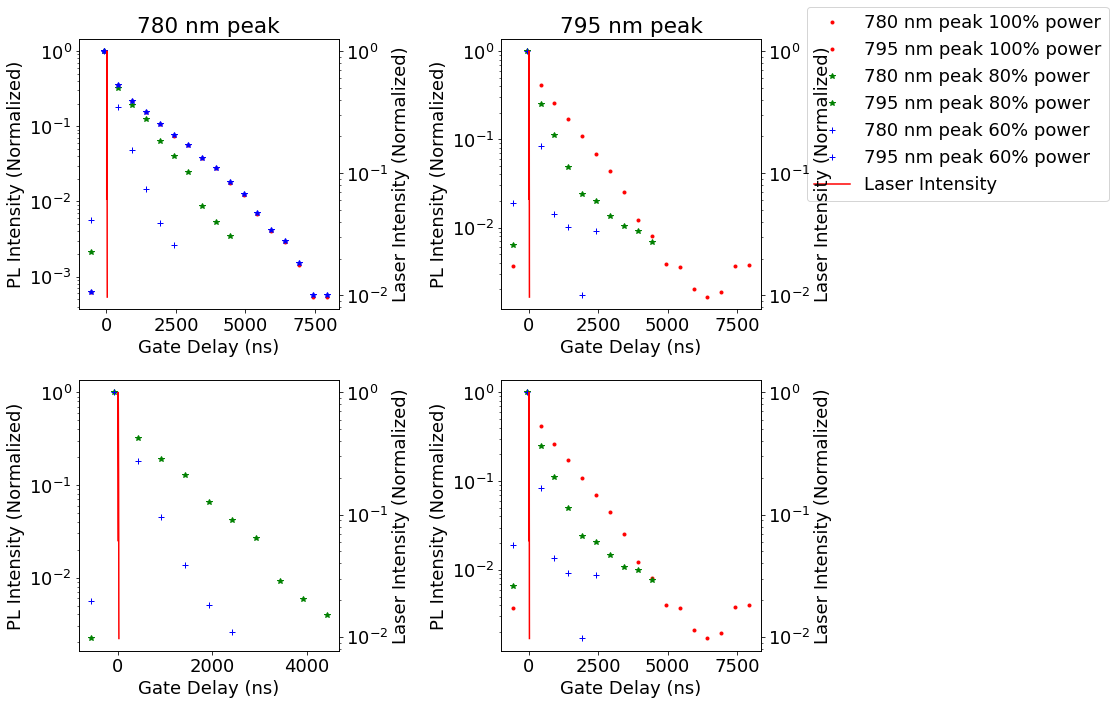

In [10]:
from matplotlib.ticker import ScalarFormatter


fig, ax1 = plt.subplots(2,2,figsize=(12,10))
ln1 = ax1[0][0].plot(NDF00_50Hz_time, NDF00_50Hz_data_p1_avg_norm, 'r.', label = '780 nm peak 100% power')
ln2 = ax1[0][1].plot(NDF00_50Hz_time, NDF00_50Hz_data_p2_avg_norm, 'r.', label = '795 nm peak 100% power')
ln3 = ax1[0][0].plot(NDF01_50Hz_time, NDF01_50Hz_data_p1_avg_norm, 'g*', label = '780 nm peak 80% power')
ln4 = ax1[0][1].plot(NDF01_50Hz_time, NDF01_50Hz_data_p2_avg_norm, 'g*', label = '795 nm peak 80% power')
ln5 = ax1[0][0].plot(NDF02_50Hz_time, NDF02_50Hz_data_p1_avg_norm, 'b+', label = '780 nm peak 60% power')
ln6 = ax1[0][1].plot(NDF02_50Hz_time, NDF02_50Hz_data_p2_avg_norm, 'b+', label = '795 nm peak 60% power')


ln7 = ax1[0][0].plot(NDF00_50Hz_time, NDF00_50Hz_data_p1_avg_norm_power, 'b*', label = '780 nm peak 100% power')
ln8 = ax1[1][1].plot(NDF00_50Hz_time, NDF00_50Hz_data_p2_avg_norm_power, 'r.', label = '795 nm peak 100% power')
ln9 = ax1[1][0].plot(NDF01_50Hz_time, NDF01_50Hz_data_p1_avg_norm_power, 'g*', label = '780 nm peak 80% power')
ln10 = ax1[1][1].plot(NDF01_50Hz_time, NDF01_50Hz_data_p2_avg_norm_power, 'g*', label = '795 nm peak 80% power')
ln11 = ax1[1][0].plot(NDF02_50Hz_time, NDF02_50Hz_data_p1_avg_norm_power, 'b+', label = '780 nm peak 60% power')
ln12= ax1[1][1].plot(NDF02_50Hz_time, NDF02_50Hz_data_p2_avg_norm_power, 'b+', label = '795 nm peak 60% power')

#plt.title("Rubidium Vapor PL (50 Hz rep rate)", loc = 'top')

for ax_row in ax1:
    for ax in ax_row:
        ax.set_xlabel("Gate Delay (ns)")
        # Make the y-axis label, ticks and tick labels match the line color.
        ax.set_ylabel("PL Intensity (Normalized)")
        ax.tick_params('y')
        ax.loglog
        #ax.set_aspect(5)
        ax2 = ax.twinx()
        ln7= ax2.plot(laser_time_off, laser_data_norm, 'r', label = 'Laser Intensity')
        ax2.set_ylabel("Laser Intensity (Normalized)")
        ax2.tick_params('y')
        ax2.set_yscale('log')
        ax.set_yscale('log')
    
    
ax1[0][0].set_title('780 nm peak')
ax1[0][1].set_title('795 nm peak')



fig.tight_layout()

lns = ln1+ln2+ln3+ln4+ln5+ln6+ln7
labs = [l.get_label() for l in lns]
ax1[0][0].legend(lns, labs, loc=(2.8,0.4))



#ax2.yaxis.set_major_formatter(ScalarFormatter())

plt.show()



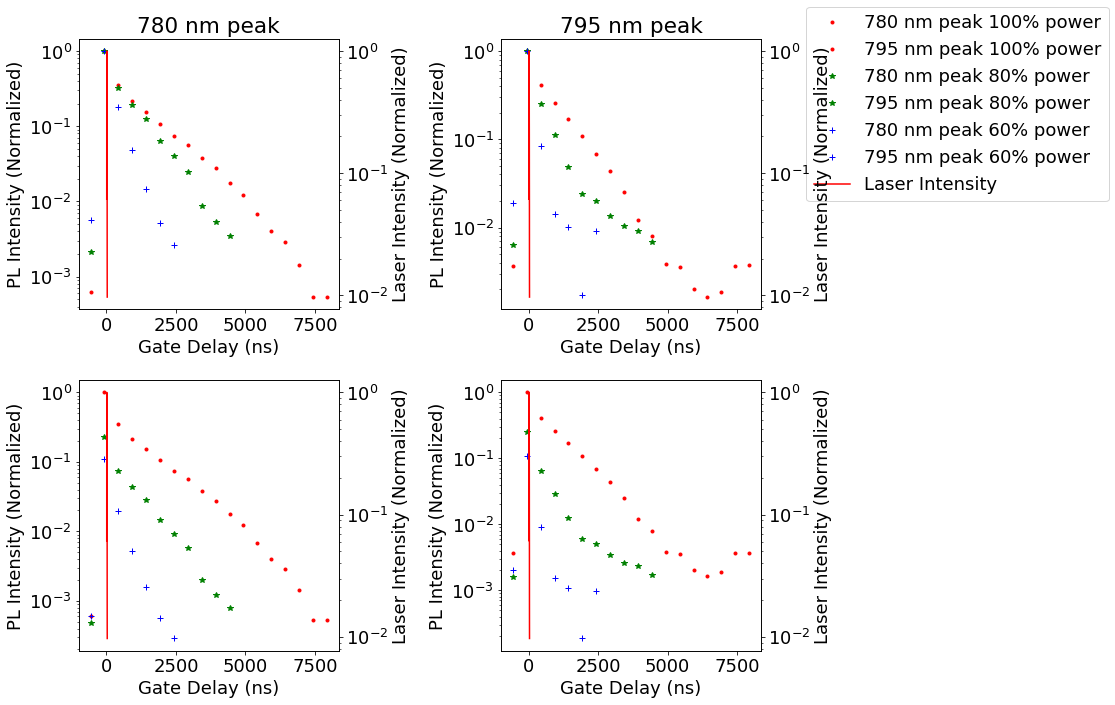

In [11]:
from matplotlib.ticker import ScalarFormatter


fig, ax1 = plt.subplots(2,2,figsize=(12,10))
ln1 = ax1[0][0].plot(NDF00_50Hz_time, NDF00_50Hz_data_p1_avg_norm, 'r.', label = '780 nm peak 100% power')
ln2 = ax1[0][1].plot(NDF00_50Hz_time, NDF00_50Hz_data_p2_avg_norm, 'r.', label = '795 nm peak 100% power')
ln3 = ax1[0][0].plot(NDF01_50Hz_time, NDF01_50Hz_data_p1_avg_norm, 'g*', label = '780 nm peak 80% power')
ln4 = ax1[0][1].plot(NDF01_50Hz_time, NDF01_50Hz_data_p2_avg_norm, 'g*', label = '795 nm peak 80% power')
ln5 = ax1[0][0].plot(NDF02_50Hz_time, NDF02_50Hz_data_p1_avg_norm, 'b+', label = '780 nm peak 60% power')
ln6 = ax1[0][1].plot(NDF02_50Hz_time, NDF02_50Hz_data_p2_avg_norm, 'b+', label = '795 nm peak 60% power')


ln7 = ax1[1][0].plot(NDF00_50Hz_time, NDF00_50Hz_data_p1_avg_norm00, 'r.', label = '780 nm peak 100% power')
ln8 = ax1[1][1].plot(NDF00_50Hz_time, NDF00_50Hz_data_p2_avg_norm00, 'r.', label = '795 nm peak 100% power')
ln9 = ax1[1][0].plot(NDF01_50Hz_time, NDF01_50Hz_data_p1_avg_norm00, 'g*', label = '780 nm peak 80% power')
ln10 = ax1[1][1].plot(NDF01_50Hz_time, NDF01_50Hz_data_p2_avg_norm00, 'g*', label = '795 nm peak 80% power')
ln11 = ax1[1][0].plot(NDF02_50Hz_time, NDF02_50Hz_data_p1_avg_norm00, 'b+', label = '780 nm peak 60% power')
ln12= ax1[1][1].plot(NDF02_50Hz_time, NDF02_50Hz_data_p2_avg_norm00, 'b+', label = '795 nm peak 60% power')

#plt.title("Rubidium Vapor PL (50 Hz rep rate)", loc = 'top')

for ax_row in ax1:
    for ax in ax_row:
        ax.set_xlabel("Gate Delay (ns)")
        # Make the y-axis label, ticks and tick labels match the line color.
        ax.set_ylabel("PL Intensity (Normalized)")
        ax.tick_params('y')
        ax.loglog
        #ax.set_aspect(5)
        ax2 = ax.twinx()
        ln7= ax2.plot(laser_time_off, laser_data_norm, 'r', label = 'Laser Intensity')
        ax2.set_ylabel("Laser Intensity (Normalized)")
        ax2.tick_params('y')
        ax2.set_yscale('log')
        ax.set_yscale('log')
    
    
ax1[0][0].set_title('780 nm peak')
ax1[0][1].set_title('795 nm peak')



fig.tight_layout()

lns = ln1+ln2+ln3+ln4+ln5+ln6+ln7
labs = [l.get_label() for l in lns]
ax1[0][0].legend(lns, labs, loc=(2.8,0.4))



#ax2.yaxis.set_major_formatter(ScalarFormatter())

plt.show()



characteristic time (ns)
100%: 1383.15551742
100% (norm 100%): 1383.15551742
80%: 947.214313275
80% (norm 100%): 947.214313275
60%: 398.174776845
60% (norm 100%): 398.174776845


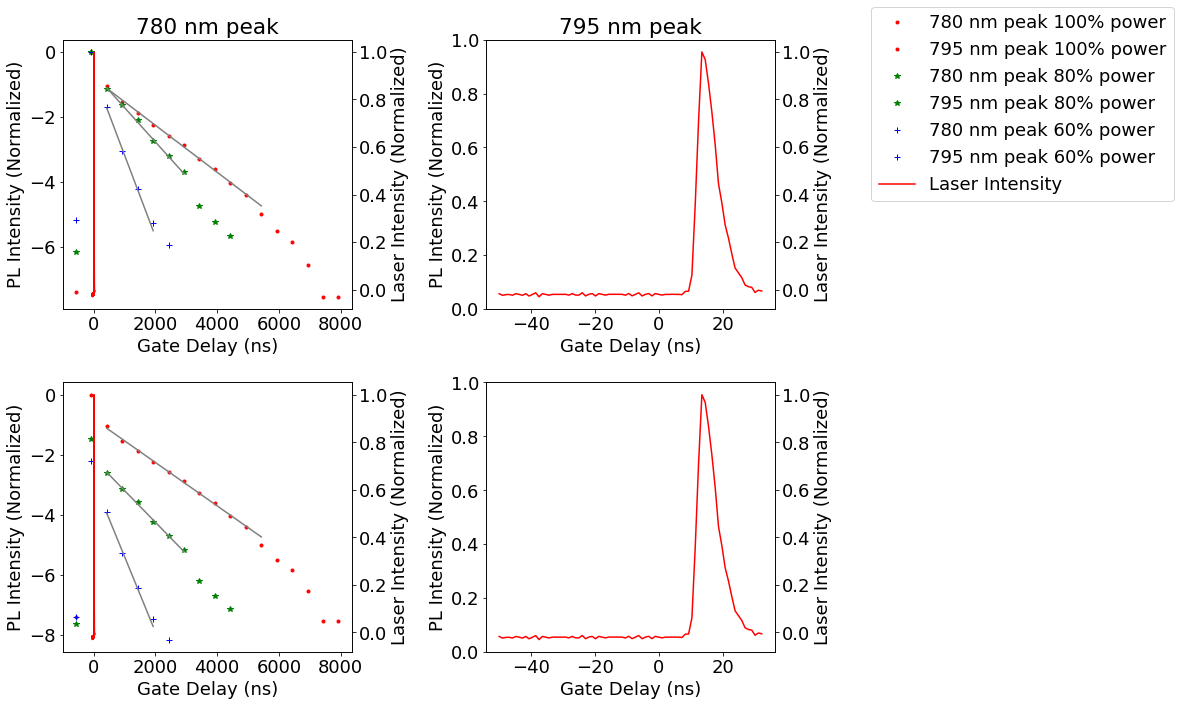

In [12]:
from matplotlib.ticker import ScalarFormatter

NDF00_50Hz_data_p1_avg_norm_ln =  np.log(NDF00_50Hz_data_p1_avg_norm)
NDF00_50Hz_data_p2_avg_norm_ln =  np.log(NDF00_50Hz_data_p2_avg_norm)
NDF01_50Hz_data_p1_avg_norm_ln =  np.log(NDF01_50Hz_data_p1_avg_norm)
NDF01_50Hz_data_p2_avg_norm_ln =  np.log(NDF01_50Hz_data_p2_avg_norm)
NDF02_50Hz_data_p1_avg_norm_ln =  np.log(NDF02_50Hz_data_p1_avg_norm)
NDF02_50Hz_data_p2_avg_norm_ln =  np.log(NDF02_50Hz_data_p2_avg_norm)

NDF00_50Hz_data_p1_avg_norm00_ln =  np.log(NDF00_50Hz_data_p1_avg_norm00)
NDF00_50Hz_data_p2_avg_norm00_ln =  np.log(NDF00_50Hz_data_p2_avg_norm00)
NDF01_50Hz_data_p1_avg_norm00_ln =  np.log(NDF01_50Hz_data_p1_avg_norm00)
NDF01_50Hz_data_p2_avg_norm00_ln =  np.log(NDF01_50Hz_data_p2_avg_norm00)
NDF02_50Hz_data_p1_avg_norm00_ln =  np.log(NDF02_50Hz_data_p1_avg_norm00)
NDF02_50Hz_data_p2_avg_norm00_ln =  np.log(NDF02_50Hz_data_p2_avg_norm00)

print("characteristic time (ns)")

fit_00 =np.polyfit(NDF00_50Hz_time[2:12], NDF00_50Hz_data_p1_avg_norm_ln[2:12], 1)
print("100%: " + str(-1/fit_00[0]))
NDF00_50Hz_data_p1_avg_norm_ln_fit =  np.poly1d(fit_00)
fit_00_00 = np.polyfit(NDF00_50Hz_time[2:12], NDF00_50Hz_data_p1_avg_norm00_ln[2:12], 1)
print("100% (norm 100%): " + str(-1/fit_00_00[0]))
NDF00_50Hz_data_p1_avg_norm00_ln_fit =  np.poly1d(fit_00_00)
t_NDF00 = np.linspace(NDF00_50Hz_time[2], NDF00_50Hz_time[12], 100)


fit_01 = np.polyfit(NDF01_50Hz_time[2:7], NDF01_50Hz_data_p1_avg_norm_ln[2:7], 1)
NDF01_50Hz_data_p1_avg_norm_ln_fit =  np.poly1d(fit_01)
print("80%: " + str(-1/fit_01[0]))
fit_01_00 = np.polyfit(NDF01_50Hz_time[2:7], NDF01_50Hz_data_p1_avg_norm00_ln[2:7], 1)
NDF01_50Hz_data_p1_avg_norm00_ln_fit =  np.poly1d(fit_01_00)
print("80% (norm 100%): " + str(-1/fit_01_00[0]))
t_NDF01 = np.linspace(NDF01_50Hz_time[2], NDF01_50Hz_time[7], 100)

fit_02 = np.polyfit(NDF02_50Hz_time[2:5], NDF02_50Hz_data_p1_avg_norm_ln[2:5], 1)
NDF02_50Hz_data_p1_avg_norm_ln_fit =  np.poly1d(fit_02)
print("60%: " + str(-1/fit_02[0]))
fit_02_00 = np.polyfit(NDF02_50Hz_time[2:5], NDF02_50Hz_data_p1_avg_norm00_ln[2:5], 1)
NDF02_50Hz_data_p1_avg_norm00_ln_fit =  np.poly1d(fit_02_00)
print("60% (norm 100%): " + str(-1/fit_02_00[0]))
t_NDF02 = np.linspace(NDF02_50Hz_time[2], NDF02_50Hz_time[5], 100)


fig, ax1 = plt.subplots(2,2,figsize=(12,10))

ln1 = ax1[0][0].plot(NDF00_50Hz_time, NDF00_50Hz_data_p1_avg_norm_ln, 'r.', label = '780 nm peak 100% power')
ax1[0][0].plot(t_NDF00, NDF00_50Hz_data_p1_avg_norm_ln_fit(t_NDF00), '-', color = 'grey', label = '780 nm peak 100% power')

#ln2 = ax1[0][1].plot(NDF00_50Hz_time, NDF00_50Hz_data_p2_avg_norm_ln, 'r.', label = '795 nm peak 100% power')

ln3 = ax1[0][0].plot(NDF01_50Hz_time, NDF01_50Hz_data_p1_avg_norm_ln, 'g*', label = '780 nm peak 80% power')
ax1[0][0].plot(t_NDF01, NDF01_50Hz_data_p1_avg_norm_ln_fit(t_NDF01), '-', color = 'grey', label = '780 nm peak 100% power')
#ln4 = ax1[0][1].plot(NDF01_50Hz_time, NDF01_50Hz_data_p2_avg_norm_ln, 'g*', label = '795 nm peak 80% power')

ln5 = ax1[0][0].plot(NDF02_50Hz_time, NDF02_50Hz_data_p1_avg_norm_ln, 'b+', label = '780 nm peak 60% power')
ax1[0][0].plot(t_NDF02, NDF02_50Hz_data_p1_avg_norm_ln_fit(t_NDF02), '-', color = 'grey', label = '780 nm peak 100% power')
#ln6 = ax1[0][1].plot(NDF02_50Hz_time, NDF02_50Hz_data_p2_avg_norm_ln, 'b+', label = '795 nm peak 60% power')


ln7 = ax1[1][0].plot(NDF00_50Hz_time, NDF00_50Hz_data_p1_avg_norm00_ln, 'r.', label = '780 nm peak 100% power')
ax1[1][0].plot(t_NDF00, NDF00_50Hz_data_p1_avg_norm00_ln_fit(t_NDF00), '-', color = 'grey', label = '780 nm peak 100% power')
#ln8 = ax1[1][1].plot(NDF00_50Hz_time, NDF00_50Hz_data_p2_avg_norm00_ln, 'r.', label = '795 nm peak 100% power')

ln9 = ax1[1][0].plot(NDF01_50Hz_time, NDF01_50Hz_data_p1_avg_norm00_ln, 'g*', label = '780 nm peak 80% power')
ax1[1][0].plot(t_NDF01, NDF01_50Hz_data_p1_avg_norm00_ln_fit(t_NDF01), '-', color = 'grey', label = '780 nm peak 100% power')
#ln10 = ax1[1][1].plot(NDF01_50Hz_time, NDF01_50Hz_data_p2_avg_norm00_ln, 'g*', label = '795 nm peak 80% power')

ln11 = ax1[1][0].plot(NDF02_50Hz_time, NDF02_50Hz_data_p1_avg_norm00_ln, 'b+', label = '780 nm peak 60% power')
ax1[1][0].plot(t_NDF02, NDF02_50Hz_data_p1_avg_norm00_ln_fit(t_NDF02), '-', color = 'grey', label = '780 nm peak 100% power')

#ln12= ax1[1][1].plot(NDF02_50Hz_time, NDF02_50Hz_data_p2_avg_norm00_ln, 'b+', label = '795 nm peak 60% power')

#plt.title("Rubidium Vapor PL (50 Hz rep rate)", loc = 'top')

for ax_row in ax1:
    for ax in ax_row:
        ax.set_xlabel("Gate Delay (ns)")
        # Make the y-axis label, ticks and tick labels match the line color.
        ax.set_ylabel("PL Intensity (Normalized)")
        ax.tick_params('y')
        ax.loglog
        #ax.set_aspect(5)
        ax2 = ax.twinx()
        ln7= ax2.plot(laser_time_off, laser_data_norm, 'r', label = 'Laser Intensity')
        ax2.set_ylabel("Laser Intensity (Normalized)")
        ax2.tick_params('y')
        #ax2.set_yscale('log')
        #ax.set_yscale('log')
    
    
ax1[0][0].set_title('780 nm peak')
ax1[0][1].set_title('795 nm peak')



fig.tight_layout()

lns = ln1+ln2+ln3+ln4+ln5+ln6+ln7
labs = [l.get_label() for l in lns]
ax1[0][0].legend(lns, labs, loc=(2.8,0.4))



#ax2.yaxis.set_major_formatter(ScalarFormatter())

plt.show()



Text(0,0.5,'Peak Intensity (counts)')

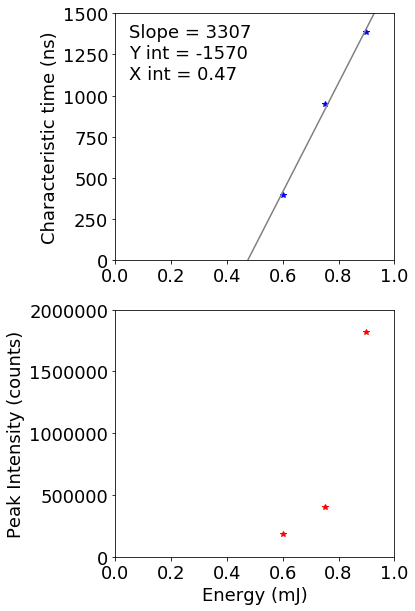

In [13]:
maximums = np.array([NDF00_50Hz_data_p1_max.max(),NDF01_50Hz_data_p1_max.max(),NDF02_50Hz_data_p1_max.max()]) 


slopes = [-1/fit_00[0],-1/fit_01[0],-1/fit_02[0]]
powers = [np.average(NDF00_50Hz_power_avg),np.average(NDF01_50Hz_power_avg),np.average(NDF02_50Hz_power_avg)]
powers = np.array(powers)*1000

fit_char =np.polyfit(powers, slopes, 1)
fit_char_f =  np.poly1d(fit_char)

x_pow = np.linspace(0, 1, 100)


fig, ax = plt.subplots(2,1,figsize=(5,10))
ax[0].set_ylabel('Characteristic time (ns)')

ax[0].set_ylim([0,1500])
ax[0].set_xlim([0,1])
ax[0].plot(powers,slopes, 'b*')
ax[0].plot(x_pow, fit_char_f(x_pow), color = 'grey')

slopestr = "{:.{}f}".format( fit_char[0], 0 )
yintstr = "{:.{}f}".format( fit_char[1], 0 )
xintstr = "{:.{}f}".format(-fit_char[1]/fit_char[0], 2 )


ax[0].text(0.05,1100,'Slope = ' + slopestr + '\nY int = ' + yintstr + '\nX int = ' + xintstr)

ax[1].plot(powers, maximums,'r*')
#ax[1].set_yscale('log')
ax[1].set_xlabel('Energy (mJ)')
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,2e6])
ax[1].set_ylabel('Peak Intensity (counts)')


In [16]:
print(maximums)

[ 1815607.   406345.   181979.]


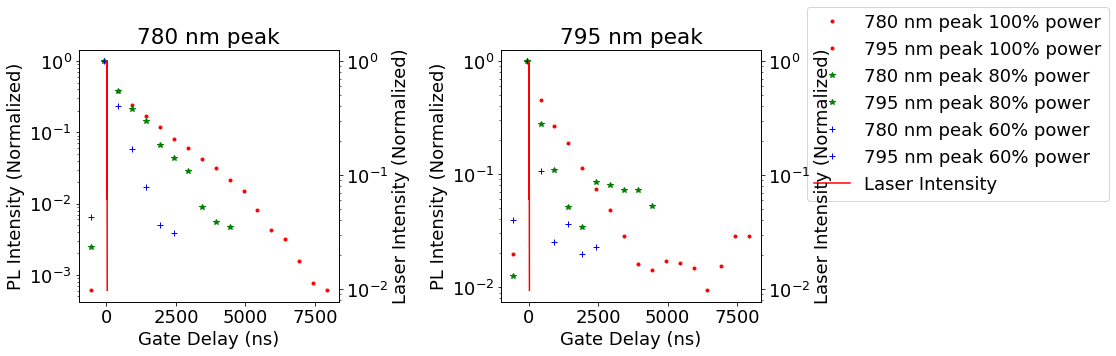

In [14]:
from matplotlib.ticker import ScalarFormatter


fig, ax1 = plt.subplots(1,2,figsize=(12,5))
ln1 = ax1[0].plot(NDF00_50Hz_time, NDF00_50Hz_data_p1_max_norm, 'r.', label = '780 nm peak 100% power')
ln2 = ax1[1].plot(NDF00_50Hz_time, NDF00_50Hz_data_p2_max_norm, 'r.', label = '795 nm peak 100% power')
ln3 = ax1[0].plot(NDF01_50Hz_time, NDF01_50Hz_data_p1_max_norm, 'g*', label = '780 nm peak 80% power')
ln4 = ax1[1].plot(NDF01_50Hz_time, NDF01_50Hz_data_p2_max_norm, 'g*', label = '795 nm peak 80% power')
ln5 = ax1[0].plot(NDF02_50Hz_time, NDF02_50Hz_data_p1_max_norm, 'b+', label = '780 nm peak 60% power')
ln6 = ax1[1].plot(NDF02_50Hz_time, NDF02_50Hz_data_p2_max_norm, 'b+', label = '795 nm peak 60% power')

plt.title("Rubidium Vapor PL (50 Hz rep rate)", loc = 'center')

for ax in ax1:
    ax.set_xlabel("Gate Delay (ns)")
    # Make the y-axis label, ticks and tick labels match the line color.
    ax.set_ylabel("PL Intensity (Normalized)")
    ax.tick_params('y')
    ax.loglog
    #ax.set_aspect(5)
    ax2 = ax.twinx()
    ln7= ax2.plot(laser_time_off, laser_data_norm, 'r', label = 'Laser Intensity')
    ax2.set_ylabel("Laser Intensity (Normalized)")
    ax2.tick_params('y')
    ax2.set_yscale('log')
    ax.set_yscale('log')
    
    
ax1[0].set_title('780 nm peak')
ax1[1].set_title('795 nm peak')



fig.tight_layout()

lns = ln1+ln2+ln3+ln4+ln5+ln6+ln7
labs = [l.get_label() for l in lns]
ax1[0].legend(lns, labs, loc=(2.8,0.4))



#ax2.yaxis.set_major_formatter(ScalarFormatter())

plt.show()



NameError: name 'time_off' is not defined

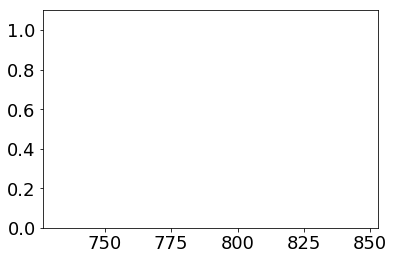

In [15]:

"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt


from matplotlib import animation, rc
from IPython.display import HTML

xs = wavelength

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(xs[0], xs[-1]), ylim=(0, 1.1))

line, = ax.plot([], [], lw=2)

time_template = 'Gate Delay = %.1fns'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    time_text.set_text('')
    ax.set_ylabel("Normalized Emission Intensity (a.u.)")
    ax.set_xlabel("Wavelength (nm)") 
    return line,

# animation function.  This is called sequentially
def animate(i):
    y = df1.iloc[:,i].as_matrix()
    y = y/data_peak1.max().max()
    line.set_data(xs, y)
    time_text.set_text(time_template % time_off[i])
    return line, time_text



# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(time_off), interval=247.5, blit=True)


#TML(anim.to_html5_video())

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

anim


In [ ]:
print(time_off)